# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Final Attribute Information

1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)
16. `exercise_problem`: 0 = no exercise problem; 1 = exercise problem (Categorical)

### Essential Libraries

Let us begin by importing the essential Python Libraries for our Decision Tree Modeling

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [2]:
# Importing our dataset
clean_data = pd.read_csv("datasets\clean_data2.csv")

print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (1000, 16)


,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,new_st_depression,slope,num_affected_vessels,defect_type,exercise_problem,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,1,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,1,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,1,140,221,0,1,164,1,0.0,0,2,0,2,0,1
996,60,1,0,125,258,0,0,141,1,2.8,1,1,1,3,1,0
997,47,1,0,110,275,0,0,118,1,1.0,1,1,1,2,1,0
998,50,0,0,110,254,0,0,159,0,0.0,0,2,0,2,0,1


In [3]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "new_st_depression", 
           "slope", "num_affected_vessels", "defect_type", "heart_disease","exercise_problem"]
num_var = [var for var in clean_data.columns if var not in cat_var]

### One Hot Encoding

As sklearn's DecisionTreeClassifier currently does not handle categorical variables, we shall be using sklearn's preprocessing `OneHotEncoding` to encode our categorical variables nominally.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# drop = "first" parameter drops the first category in each feature
ohe = OneHotEncoder(drop = "first")

# One-Hot Encoding of categorical predictors
cat_pred = clean_data[cat_var].drop(["slope", "num_affected_vessels", "heart_disease"], axis = 1)
ohe.fit(cat_pred)

cat_pred_ohe = pd.DataFrame(ohe.transform(cat_pred).toarray(), 
             columns = ohe.get_feature_names_out(cat_pred.columns))

# Check the encoded variables
cat_pred_ohe.info()

# Concatenate with the numeric variables
clean_data_encoded = pd.concat([clean_data[num_var], cat_pred_ohe, 
                            clean_data[["slope", "num_affected_vessels", "heart_disease"]]], axis = 1)

clean_data_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex_1                      1000 non-null   float64
 1   chest_pain_1               1000 non-null   float64
 2   chest_pain_2               1000 non-null   float64
 3   chest_pain_3               1000 non-null   float64
 4   fasting_blood_sugar_1      1000 non-null   float64
 5   resting_ecg_result_1       1000 non-null   float64
 6   resting_ecg_result_2       1000 non-null   float64
 7   exercise_induced_angina_1  1000 non-null   float64
 8   new_st_depression_1        1000 non-null   float64
 9   defect_type_2              1000 non-null   float64
 10  defect_type_3              1000 non-null   float64
 11  exercise_problem_1         1000 non-null   float64
dtypes: float64(12)
memory usage: 93.9 KB


,age,blood_pressure,cholesterol,max_heart_rate,st_depression,sex_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,resting_ecg_result_1,resting_ecg_result_2,exercise_induced_angina_1,new_st_depression_1,defect_type_2,defect_type_3,exercise_problem_1,slope,num_affected_vessels,heart_disease
0,52,125,212,168,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,2,0
1,53,140,203,155,3.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0
2,70,145,174,125,2.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0
3,61,148,203,161,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1,0
4,62,138,294,106,1.9,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2,0,1
996,60,125,258,141,2.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,1,0
997,47,110,275,118,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,0
998,50,110,254,159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0,1


### Splitting our dataset

We will be utilising the train_test_split function to split our data into our desired 80:20 ratio 

In [5]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(clean_data_encoded['heart_disease'])
X = pd.DataFrame(clean_data_encoded.drop('heart_disease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 18)

### Decision Tree Modeling

We will be using a decision tree as our initial model to test our hypothesis

[Text(0.5, 0.9, 'defect_type_2 <= 0.5\ngini = 0.5\nsamples = 800\nvalue = [399, 401]\nclass = Heart Disease'),
 Text(0.25, 0.7, 'st_depression <= 0.55\ngini = 0.334\nsamples = 368\nvalue = [290, 78]\nclass = No Heart Disease'),
 Text(0.125, 0.5, 'blood_pressure <= 122.0\ngini = 0.499\nsamples = 93\nvalue = [45, 48]\nclass = Heart Disease'),
 Text(0.0625, 0.3, 'cholesterol <= 174.5\ngini = 0.298\nsamples = 33\nvalue = [6, 27]\nclass = Heart Disease'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No Heart Disease'),
 Text(0.09375, 0.1, 'gini = 0.18\nsamples = 30\nvalue = [3, 27]\nclass = Heart Disease'),
 Text(0.1875, 0.3, 'chest_pain_2 <= 0.5\ngini = 0.455\nsamples = 60\nvalue = [39, 21]\nclass = No Heart Disease'),
 Text(0.15625, 0.1, 'gini = 0.401\nsamples = 54\nvalue = [39, 15]\nclass = No Heart Disease'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Heart Disease'),
 Text(0.375, 0.5, 'chest_pain_3 <= 0.5\ngini = 0.194\nsamples = 275\

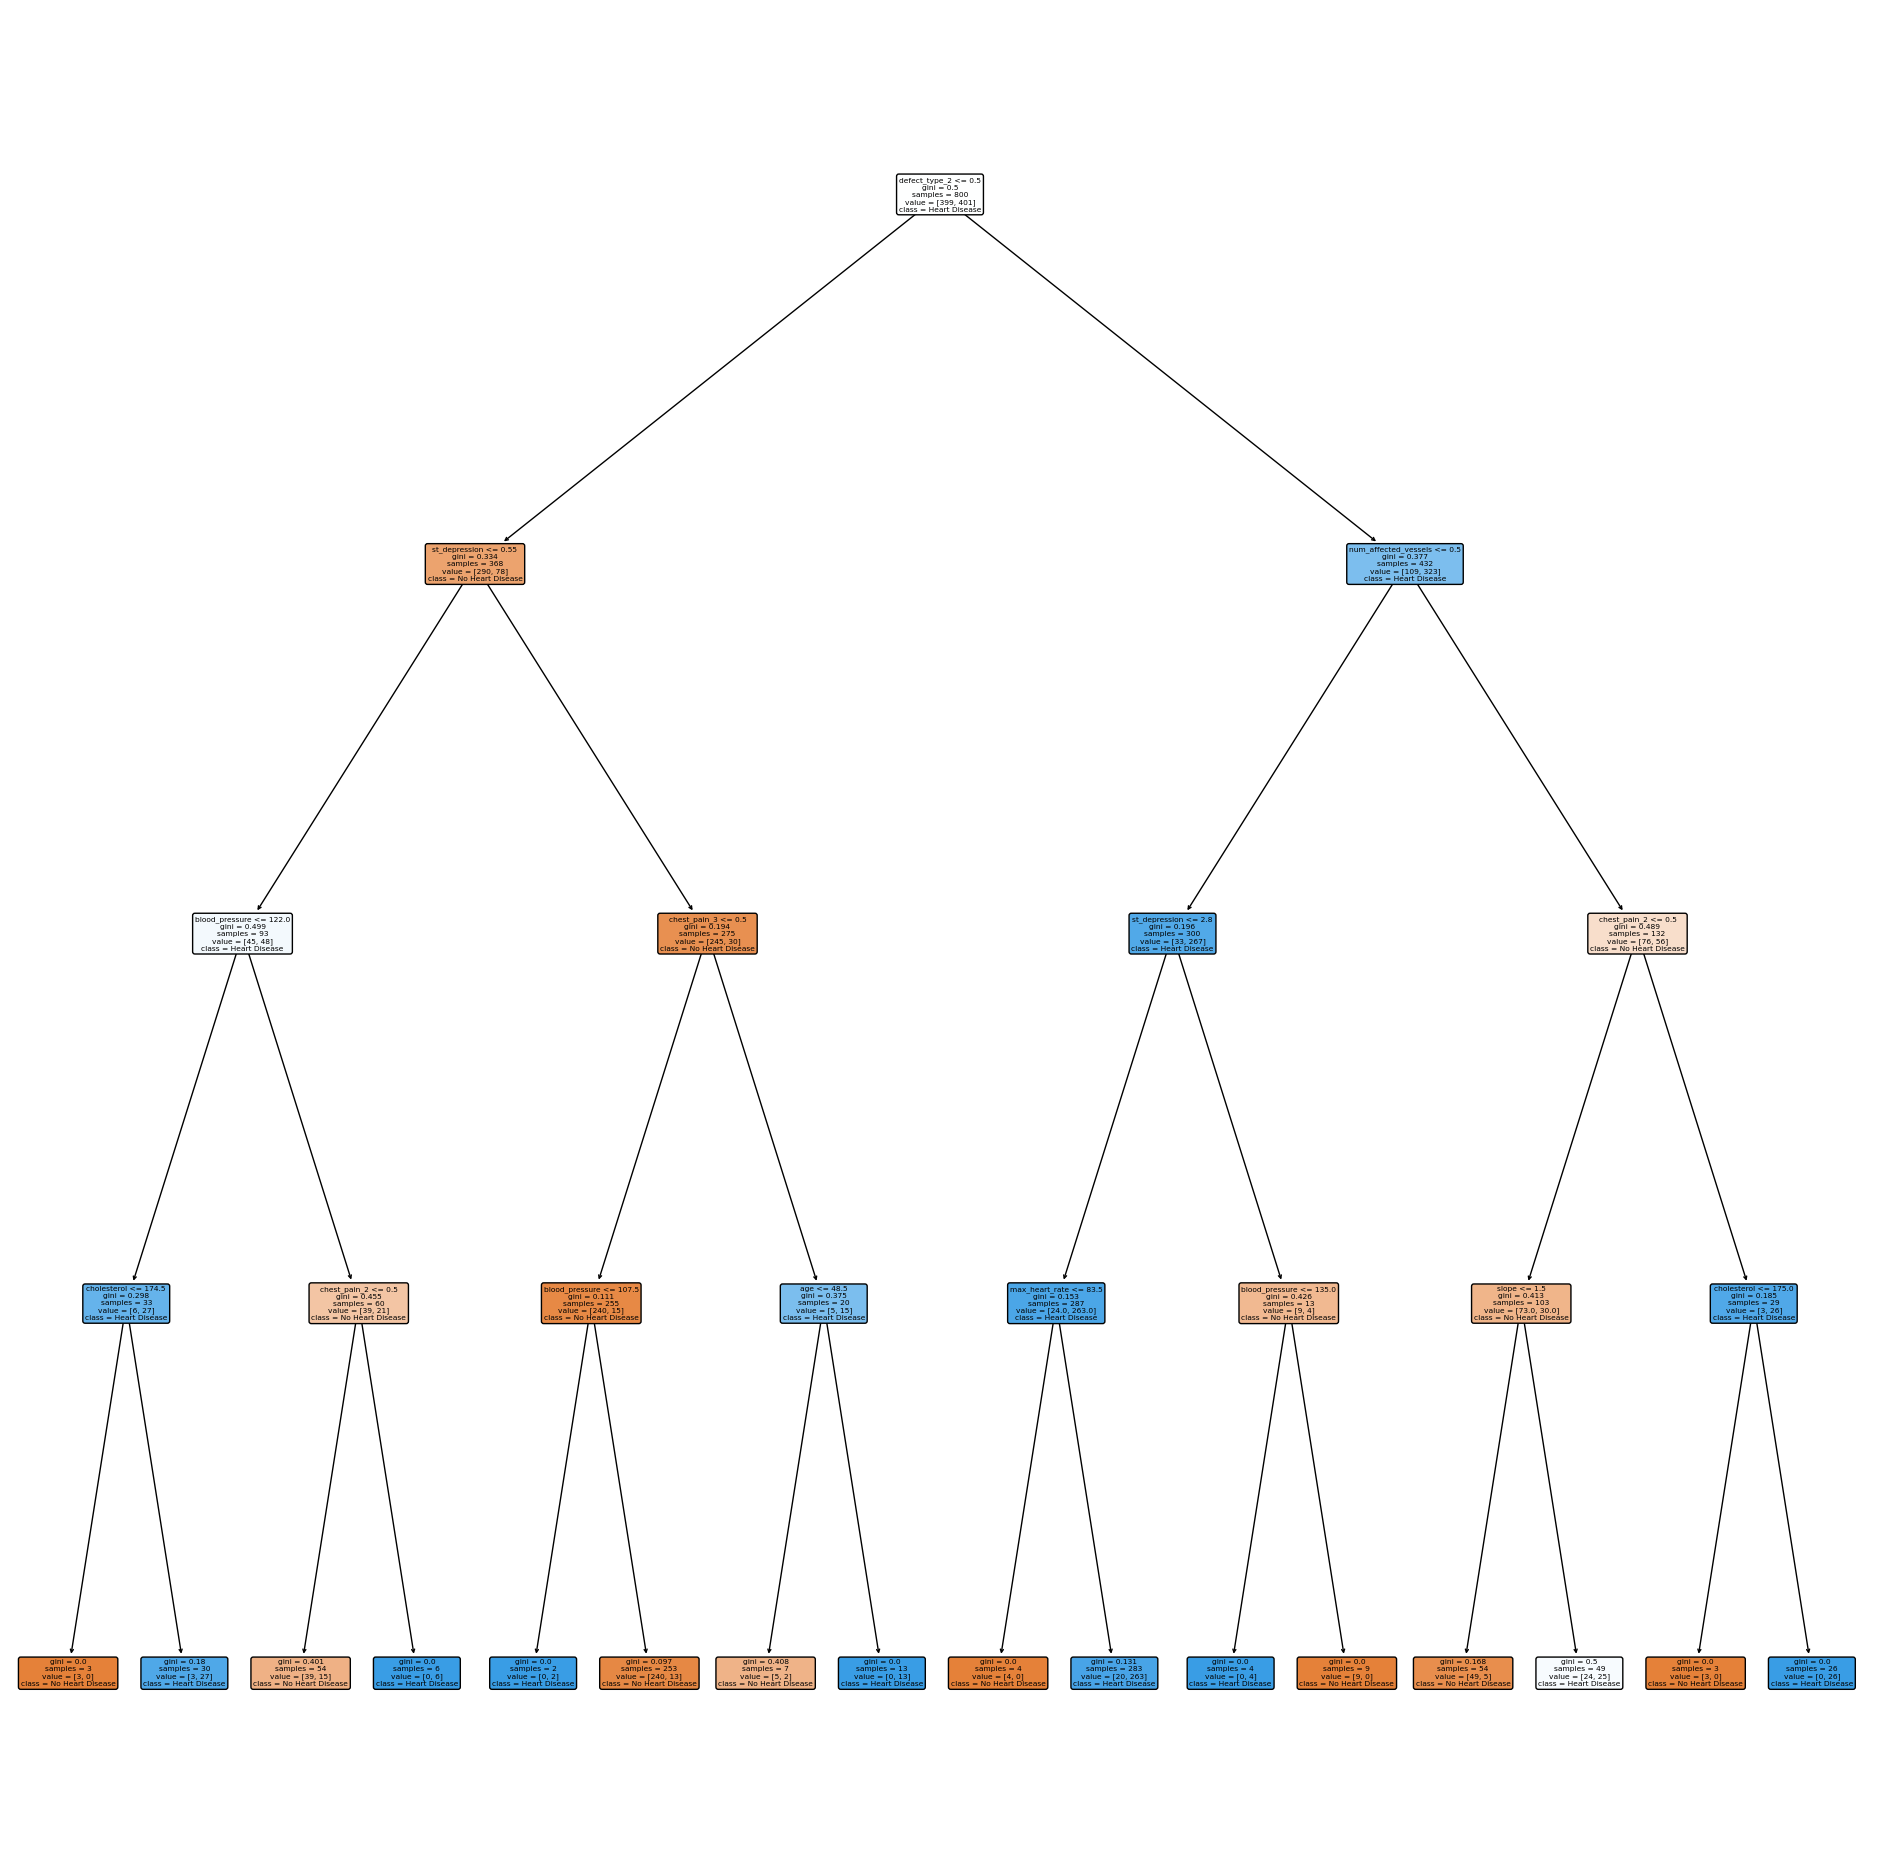

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dectree = DecisionTreeClassifier(max_depth = 4, random_state=42)
dectree.fit(X_train, y_train)  
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["No Heart Disease","Heart Disease"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Test Data
Accuracy  :	 0.815

TPR Test :	 0.822429906542056
TNR Test :	 0.8064516129032258

FPR Test :	 0.1935483870967742
FNR Test :	 0.17757009345794392


<Axes: >

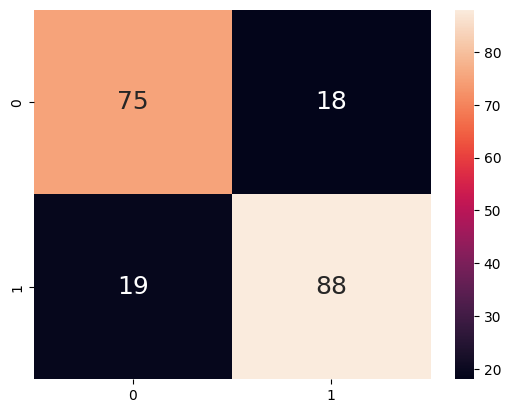

In [7]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Hyperparameter Tuning: GridSearchCV
Model parameters are the weights and coefficients that the model's algorithm extracts from the data. On the other hand, hyperparameters are adjustable parameters that can be used to control the model's learning, such as the maximum depth for a decision tree. Hyperparameter optimisation is the tuning of these parameters to optimise the model's performance.

We shall use `GridSearchCV` from `sklearn` library to perform hyperparameter tuning. GridSearch performs an exhaustive searching over combinations of parameters and measures them against a specified score.

In addition, `GridSearchCV` also performs K-Fold cross validation. K-Fold cross validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds, and the model is trained and evaluated k times, using k - 1 folds for training and the last fold for testing each time. In every iteration, a different fold is used as the validation set. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This allows us to train and test our model on the entire given dataset. It also allows us to assess our model's performance more accurately while preventing overfitting of our data.

The number of folds (k) is determined by the `cv` parameter in `GridSearchCV()`. Generally, the choice of k depends on the dataset size and desired bias-variance trade-off. Typical values are k = 5, k = 10 and k = 20. A larger k value can also result in longer computational times (k-folds cross validation has a time complexity of O(kN).

From *An Introduction to Statistical Learning* (2013, p. 184),

> To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

We shall choose a k value of 10. 

Note that some penalties may not work with some solvers. As such, `FitFailedWarning` will be raised during gridsearch. We will also import the `warnings` library, `ConvergenceWarning` and `FitFailedWarning` from `sklearn.exceptions` to suppress convergence and fitfailed warnings.

maximum depth of tree: 10
Best estimator: DecisionTreeClassifier(max_depth=10, random_state=42)

Best parameters: {'max_depth': 10}

Best score: 0.975


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 110.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", li

Text(0, 0.5, 'k-fold_Mean_test_score')

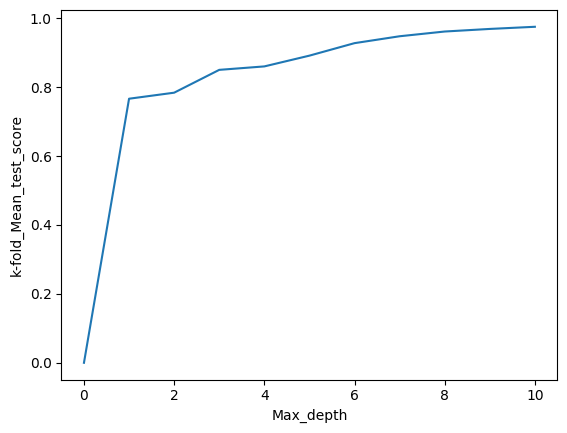

In [12]:
# Split the data into predictors and response
X = clean_data_encoded.drop(["heart_disease"], axis = 1)
y = clean_data_encoded["heart_disease"]

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
import warnings

#First we determine max depth of DecisionTreeClassifier to find its range
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train) 
maximum = dectree.tree_.max_depth
print("maximum depth of tree:",maximum)

# Create dictionary of parameters, in this case we only used 1 parameter, depth.
param_grid = {"max_depth" : [i for i in range(maximum+1)]}

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category = ConvergenceWarning)
    warnings.filterwarnings("ignore", category = FitFailedWarning)
             

# We want to optimise for accuracy

new_dec_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid = param_grid, cv = 10, scoring = "accuracy", error_score = 0)

new_dec_tree.fit(X_train, y_train)

print("Best estimator:", new_dec_tree.best_estimator_)
print()
print("Best parameters:", new_dec_tree.best_params_)
print()
print("Best score:", new_dec_tree.best_score_)
#We can plot the mean test_scores of k-fold cross validation against max_depth
x = param_grid["max_depth"]
y = new_dec_tree.cv_results_["mean_test_score"]
plt.plot(x,y)
plt.xlabel("Max_depth")
plt.ylabel("k-fold_Mean_test_score")

### Optimised Model

It appears the best estimator that GridSearchCV found was `DecisionTreeClassifier(max_depth=10, random_state=42)`. Note that many of the parameters are by default the best values, and thus we do not need to state the parameters. 

We shall check the accuracy again based on these parameters. 

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0

Test Data
Accuracy  :	 0.98

TPR Test :	 1.0
TNR Test :	 0.956989247311828

FPR Test :	 0.043010752688172046
FNR Test :	 0.0


<Axes: >

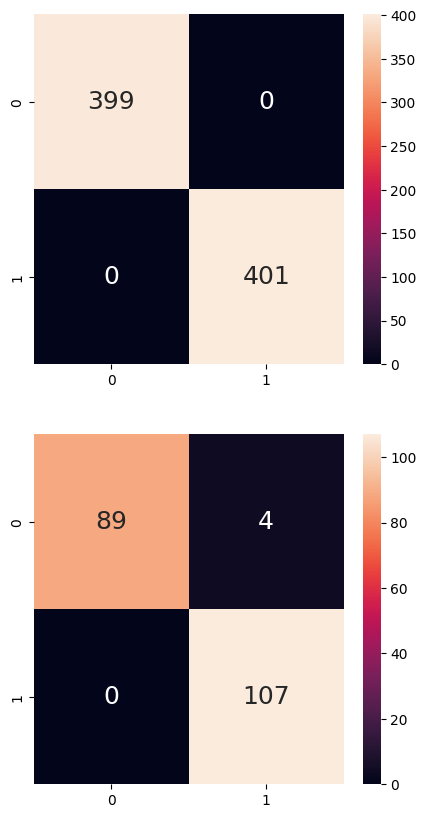

In [13]:
dectree = DecisionTreeClassifier(max_depth = 10,random_state=42)
dectree.fit(X_train, y_train)  
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy for train data
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for train data
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(fpTrain + tnTrain)))
print("FNR Train :\t", (fnTrain/(fnTrain + tpTrain)))
print()

# Print the Classification Accuracy for test data
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for test data
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(5,10))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax1)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax2)



### Findings

As expected, our optimised model performs the best on the train data, with the highest classification accuracy of 1.0. Furthermore, our new model with optimal max_depth = 10 outperforms our old model max_depth = 4 (0.98 > 0.815) on the test data in terms of classification accuracy.

## Feature Importance

Ranking the features according to how much they contribute to the final predictions can be achieved by using feature importance. Scikit has a built in attribute within the DecisionTreeClassifier class for this. 

In [10]:
importances = dectree.feature_importances_
print(dectree.feature_names_in_)

['age' 'blood_pressure' 'cholesterol' 'max_heart_rate' 'st_depression'
 'sex_1' 'chest_pain_1' 'chest_pain_2' 'chest_pain_3'
 'fasting_blood_sugar_1' 'resting_ecg_result_1' 'resting_ecg_result_2'
 'exercise_induced_angina_1' 'new_st_depression_1' 'defect_type_2'
 'defect_type_3' 'exercise_problem_1' 'slope' 'num_affected_vessels']


Here we plot the mean decrease in impurity of each variable. Node impurity measures how well the data in split in a node. In our case a very impure node indicates that we are unable to predict if a patient has heart disease using the variables up to that node. Mean decrease in impurity measures the decrease in node impurity from a parent node to a child node, indicating that it is a more important variable in predicting heart disease.

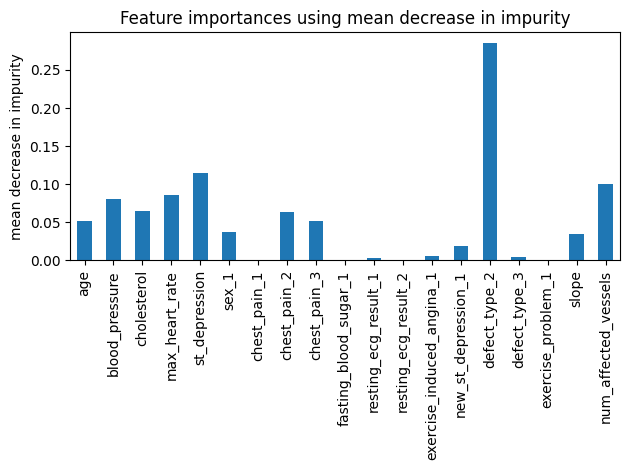

In [11]:
dec_importances = pd.Series(importances, index=dectree.feature_names_in_)

fig, ax = plt.subplots()
dec_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using mean decrease in impurity")
ax.set_ylabel("mean decrease in impurity")
fig.tight_layout()

## Conclusion

As we can see defect_type_2(fixed defect), number of affected vessels(vessels coloured by fluoroscopy) and st_depression(ST depression induced by exercise relative to rest) were the best predictors in heart disease, while predictors such as chest_pain_1(no chest pain), fasting_blood_sugar_1(whether they had fasting blood sugar > 120 mg/dl) and resting_ecg_result_2 were poor predictors in seeing if a patient had heart disease